<a href="https://colab.research.google.com/github/vbhaktha13/ML/blob/main/rdkit_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df_opendrug = pd.read_csv("https://raw.githubusercontent.com/OpenDrugAI/AttentiveFP/master/data/qm9.csv")

In [4]:
df_opendrug.shape

(133885, 21)

In [5]:
df_opendrug.head(2)

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_1,C,157.71180,157.70997,157.70699,0.0000,13.21,-0.3877,0.1171,0.5048,...,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772
1,gdb_2,N,293.60975,293.54111,191.39397,1.6256,9.46,-0.2570,0.0829,0.3399,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802


In [6]:
df_opendrug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133885 entries, 0 to 133884
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   mol_id     133885 non-null  object 
 1   smiles     133885 non-null  object 
 2   A          133885 non-null  float64
 3   B          133885 non-null  float64
 4   C          133885 non-null  float64
 5   mu         133885 non-null  float64
 6   alpha      133885 non-null  float64
 7   homo       133885 non-null  float64
 8   lumo       133885 non-null  float64
 9   gap        133885 non-null  float64
 10  r2         133885 non-null  float64
 11  zpve       133885 non-null  float64
 12  u0         133885 non-null  float64
 13  u298       133885 non-null  float64
 14  h298       133885 non-null  float64
 15  g298       133885 non-null  float64
 16  cv         133885 non-null  float64
 17  u0_atom    133885 non-null  float64
 18  u298_atom  133885 non-null  float64
 19  h298_atom  133885 non-n

In [7]:
#Filter the data point that does not contain Sulphur and Chlorine atoms
df_opendrug.loc[df_opendrug['smiles'].str.contains('S')]

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom


In [8]:
df_opendrug. loc[df_opendrug['smiles'].str.contains('Cl')]

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom


In [10]:
df_opendrug1 = df_opendrug.loc[ df_opendrug['smiles'].str.contains(pat='cncc1O')]

In [11]:
#Extract Atomization energies at 298K from the above data frame as a NumPy array.
RTk_atom =df_opendrug[['u298_atom']]

In [12]:
RTk_atom

,u298_atom
0,-398.643290
1,-278.620271
2,-213.974294
3,-387.237686
4,-302.906752
...,...
133880,-1614.898804
133881,-1612.291504
133882,-1678.830048
133883,-1807.210860


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d945b5090>]],
      dtype=object)

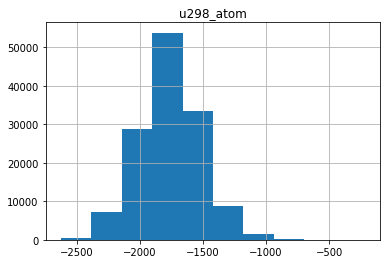

In [13]:
#Make a histplot of the Atomization energies in kcal/mol.
RTk_atom.hist()

In [14]:
#Convert atomization energy units to Hartrees (relation: 1HF = 627.5 kcal/mol)#On the filtered data:
df_opendrug['u298_atom_HT']=df_opendrug['u298_atom'].div(627.5)

In [15]:
#Convert atomization energy units to Hartrees (relation: 1HF = 627.5 kcal/mol)#On the filtered data:
df_opendrug['u0_atom_HT']=df_opendrug['u0_atom'].div(627.5)

In [16]:
df_opendrug.head(3)

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom,u298_atom_HT,u0_atom_HT
0,gdb_1,C,157.71180,157.70997,157.70699,0.0000,13.21,-0.3877,0.1171,0.5048,...,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772,-0.635288,-0.631075
1,gdb_2,N,293.60975,293.54111,191.39397,1.6256,9.46,-0.2570,0.0829,0.3399,...,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802,-0.444016,-0.441213
2,gdb_3,O,799.58812,437.90386,282.94545,1.8511,6.31,-0.2928,0.0687,0.3615,...,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171,-0.340995,-0.339582


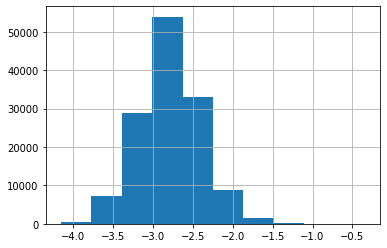

In [17]:
#Make a histplot of the Atomization energies in hartrees.
df_opendrug['u0_atom_HT'].hist()

In [18]:
#Make a scatter plot for “Number of atoms” vs “Atomization energy in Hartrees”of the molecules 
#(Reference:https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_opendrug.head(20)

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom,u298_atom_HT,u0_atom_HT
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,...,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772,-0.635288,-0.631075
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,...,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802,-0.444016,-0.441213
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,...,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171,-0.340995,-0.339582
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,...,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724,-0.617112,-0.614346
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,...,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028,-0.482720,-0.480989
5,gdb_6,C=O,285.48839,38.982300,34.298920,2.1089,14.18,-0.2670,-0.0406,0.2263,...,-114.480746,-114.479802,-114.505268,6.413,-358.756935,-360.512706,-362.291066,-340.464421,-0.574522,-0.571724
6,gdb_7,CC,80.46225,19.906490,19.906330,0.0000,23.95,-0.3385,0.1041,0.4426,...,-79.760666,-79.759722,-79.787269,10.098,-670.788296,-675.710476,-679.860821,-626.927299,-1.076829,-1.068985
7,gdb_8,CO,127.83497,24.858720,23.978720,1.5258,16.97,-0.2653,0.0784,0.3437,...,-115.675816,-115.674872,-115.701876,8.751,-481.106758,-484.355372,-487.319724,-450.124128,-0.771881,-0.766704
8,gdb_9,CC#C,160.28041,8.593230,8.593210,0.7156,28.78,-0.2609,0.0613,0.3222,...,-116.605550,-116.604606,-116.633775,12.482,-670.268091,-673.980434,-677.537155,-631.346845,-1.074072,-1.068156
9,gdb_10,CC#N,159.03567,9.223270,9.223240,3.8266,24.45,-0.3264,0.0376,0.3640,...,-132.714563,-132.713619,-132.742149,10.287,-589.812024,-592.893721,-595.857446,-557.125708,-0.944851,-0.939939


In [21]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c rdkit rdkit

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-04-08 09:58:50--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh [following]
--2022-04-08 09:58:50--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.3-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  84.75M   201MB/s    in 0.4s    

2022-04-08 09:58:51 (201 MB/s) - ‘Minicon

In [22]:
import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw


In [23]:
#df1.index.tolist()


In [24]:
#def atom_no(row):
#mol = Chem.MolFromSmiles(row['smiles'])
#mol_with_explicit_h = Chem.AddHs(mol)
#return mol_with_explicit_h.GetNumAtoms()

In [25]:
# Create an rdkit mol object list
mol_list= []
for element in df_opendrug["smiles"]:
  mol = Chem.MolFromSmiles(element)
  mol_with_explicit_h = Chem.AddHs(mol)
  atom_num=mol_with_explicit_h.GetNumAtoms()
  mol_list.append(atom_num)
 # print(mol_list)
#for smile in df_opendrug["smiles"]:
      #mol = Chem.MolFromSmiles(str(smile))
      
# Iterate over the atoms
#num_list= []
#for atom in mol_with_explicit_h.GetAtoms():
    #atom_num= mol_with_explicit_h.GetNumAtoms()
    #num_list.append(atom_num)
    #print(num_list)

In [26]:
mol_list

[5,
 4,
 3,
 4,
 3,
 4,
 8,
 6,
 7,
 6,
 7,
 6,
 11,
 9,
 9,
 9,
 7,
 10,
 9,
 8,
 14,
 12,
 6,
 5,
 4,
 6,
 5,
 6,
 10,
 10,
 9,
 8,
 8,
 7,
 10,
 9,
 8,
 8,
 14,
 12,
 12,
 10,
 12,
 10,
 11,
 10,
 12,
 10,
 12,
 10,
 9,
 9,
 8,
 17,
 15,
 9,
 8,
 8,
 8,
 9,
 9,
 8,
 13,
 12,
 11,
 11,
 10,
 13,
 11,
 12,
 11,
 13,
 12,
 12,
 11,
 12,
 11,
 10,
 10,
 10,
 15,
 13,
 17,
 15,
 15,
 15,
 13,
 13,
 10,
 11,
 10,
 9,
 10,
 9,
 15,
 13,
 13,
 13,
 11,
 15,
 13,
 14,
 13,
 11,
 13,
 11,
 9,
 8,
 7,
 9,
 8,
 9,
 8,
 8,
 9,
 8,
 9,
 11,
 13,
 12,
 13,
 12,
 11,
 11,
 10,
 11,
 10,
 13,
 12,
 11,
 11,
 11,
 17,
 15,
 15,
 15,
 13,
 13,
 11,
 10,
 9,
 10,
 9,
 8,
 11,
 10,
 9,
 10,
 15,
 13,
 14,
 13,
 13,
 12,
 11,
 13,
 10,
 11,
 15,
 13,
 11,
 13,
 11,
 11,
 9,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 6,
 7,
 6,
 5,
 11,
 13,
 15,
 13,
 12,
 11,
 5,
 10,
 9,
 10,
 9,
 8,
 13,
 12,
 11,
 11,
 12,
 11,
 10,
 10,
 11,
 10,
 10,
 13,
 12,
 12,
 11,
 12,
 11,
 11,
 10,
 11,
 10,
 9,
 13,
 12,
 12,
 11,
 

In [38]:
# Calling Series constructor on list

atom_num1=pd.Series(mol_list)



In [40]:
df_opendrug['atom_num1'] = atom_num1
df_opendrug.head(2)


,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom,u298_atom_HT,u0_atom_HT,atom_num1
0,gdb_1,C,157.71180,157.70997,157.70699,0.0000,13.21,-0.3877,0.1171,0.5048,...,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772,-0.635288,-0.631075,5
1,gdb_2,N,293.60975,293.54111,191.39397,1.6256,9.46,-0.2570,0.0829,0.3399,...,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802,-0.444016,-0.441213,4


In [41]:
df_opendrug.shape

(133885, 24)

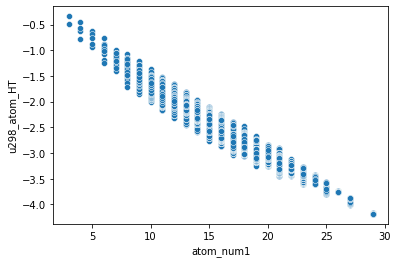

In [43]:
#scatter plot of number of atoms vs atomization energies Q9
sns.scatterplot( x=df_opendrug['atom_num1'], y=df_opendrug['u298_atom_HT'])